# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

**Healthcare Project: Predicting Kidney Disease Progression**

Who
* Nephrologists, doctors who specialize in diagnosing and treating kidney diseases would be interested in my data story since we are predicting the progression of kidney disease along with different risk factors.
* Hospital admins and healthcare executives that oversee nephrology departments would also be interested since the findings could help them manage resources across the departments and adjust their protocols.

What
* We will use a dataset of 400 patient records from Enam Medical College (Bangladesh)
containing 25 lab variables related to Chronic Kidney Disease diagnosis. From this dataset we will train classification models on identifying key predictive risk factors. For example, we will look at determining which of the 25 variables are the most strongly correlated with the progression of Chronic Kidney Disease. We can classify patients based on their risk level using the different factors. From there we can see if the overlapping of these different factors might differ in conditions like Acute Kidney injury giving a broader perspective.

Why
* When we identify which risk factors contribute to the progression of Chronic Kidney Disease, nephrologists can better help patients with treatment plans. They can monitor these specific risk factors that are higher and recommend potential interventions earlier. Doctors can also come up with personalized treatment plans depending on the patient's different risk factors. Also, healthcare executives can better allocate hospital and practice resources by predicting which patients are at higher risk.

# 3. Homework - work with your own data

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [31]:
df = pd.read_csv('week-2-dataset.csv', header=0)

# removing rows 0 and row 1 since they are all `discrete` and `NaN` respectively
rows_to_remove = [0, 1]
df_cleaned = df.drop(index=rows_to_remove)
df_cleaned = df_cleaned.reset_index(drop=True)

# rename columns so they're more descriptive and we can see what they actually mean
rename_map = {
    'age': 'age',
    'bp (Diastolic)': 'diastolic_blood_pressure',
    'bp limit': 'bp_limit_flag',
    'sg': 'specific_gravity',
    'al': 'albumin',
    'su': 'sugar',
    'rbc': 'red_blood_cells',
    'pc': 'pus_cell',
    'pcc': 'pus_cell_clumps',
    'ba': 'bacteria',
    'bgr': 'blood_glucose_random',
    'bu': 'blood_urea',
    'sc': 'serum_creatinine',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'haemoglobin',
    'pcv': 'packed_cell_volume',
    'wbcc': 'white_blood_cell_count',
    'rbcc': 'red_blood_cell_count',
    'htn': 'hypertension',
    'dm': 'diabetes_mellitus',
    'cad': 'coronary_artery_disease',
    'appet': 'appetite',
    'pe': 'pedal_edema',
    'ane': 'anaemia',
    'grf': 'glomerular_filtration_rate',
    'stage': 'stage',
    'affected': 'affected',
    'class': 'class'
}

df_cleaned = df_cleaned.rename(columns=rename_map)

print(df_cleaned.columns)

Index(['diastolic_blood_pressure', 'bp_limit_flag', 'specific_gravity',
       'albumin', 'class', 'red_blood_cells', 'sugar', 'pus_cell',
       'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea',
       'sodium', 'serum_creatinine', 'potassium', 'haemoglobin',
       'packed_cell_volume', 'red_blood_cell_count', 'white_blood_cell_count',
       'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
       'appetite', 'pedal_edema', 'anaemia', 'glomerular_filtration_rate',
       'stage', 'affected', 'age'],
      dtype='object')


In [16]:
# Summarize the dataset using info()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bp (Diastolic)  200 non-null    object
 1   bp limit        200 non-null    object
 2   sg              200 non-null    object
 3   al              200 non-null    object
 4   class           200 non-null    object
 5   rbc             200 non-null    object
 6   su              200 non-null    object
 7   pc              200 non-null    object
 8   pcc             200 non-null    object
 9   ba              200 non-null    object
 10  bgr             200 non-null    object
 11  bu              200 non-null    object
 12  sod             200 non-null    object
 13  sc              200 non-null    object
 14  pot             200 non-null    object
 15  hemo            200 non-null    object
 16  pcv             200 non-null    object
 17  rbcc            200 non-null    object
 18  wbcc      

In [17]:
# Summarize the dataset using describe()
df_cleaned.describe()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
count,200,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200
unique,2,3,5,5,2,2,6,2,2,2,...,2,2,2,2,2,2,11,5,2,10
top,1,0,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,< 26.6175,s1,1,59 - 66
freq,108,95,75,116,128,175,170,155,173,189,...,122,130,178,160,165,168,68,54,128,48


In [18]:
# Are there any duplicate rows?
duplicates = df_cleaned.duplicated()
print("Duplicate rows:")
if len(df_cleaned[duplicates]) > 0:
    print(df_cleaned[duplicates])
else:
    print('no duplicates')

Duplicate rows:
no duplicates


In [24]:
# Are there any duplicate values in a given column (when this would be inappropriate?)
# I'm really not worried about duplicate values in a given column with this dataset. This is because a lot of them are either ranges like age, glomerular_filtration_rate and white_blood_cell_count or true/false values like pus_cell, pus_cell_clumps and bacteria.

for col in df_cleaned.columns:
    value_counts = df_cleaned[col].value_counts()
    duplicate_values = value_counts[value_counts > 1]

    total_duplicates = sum(duplicate_values)
    duplicate_pct = (total_duplicates / len(df_cleaned)) * 100

    print(f"\n{col}:")
    print(f"- Total values: {len(df_cleaned)}")
    print(f"- Unique values: {df_cleaned[col].nunique()}")
    print(f"- Duplicate values: {total_duplicates} ({duplicate_pct:.1f}%)")
    print(f"- Top 5 most common values: \n{value_counts.head(5)}")


bp (Diastolic):
- Total values: 200
- Unique values: 2
- Duplicate values: 200 (100.0%)
- Top 5 most common values: 
bp (Diastolic)
1    108
0     92
Name: count, dtype: int64

bp_limit_flag:
- Total values: 200
- Unique values: 3
- Duplicate values: 200 (100.0%)
- Top 5 most common values: 
bp_limit_flag
0    95
1    59
2    46
Name: count, dtype: int64

specific_gravity:
- Total values: 200
- Unique values: 5
- Duplicate values: 200 (100.0%)
- Top 5 most common values: 
specific_gravity
1.019 - 1.021    75
1.009 - 1.011    45
≥ 1.023          41
1.015 - 1.017    36
< 1.007           3
Name: count, dtype: int64

albumin:
- Total values: 200
- Unique values: 5
- Duplicate values: 200 (100.0%)
- Top 5 most common values: 
albumin
< 0      116
2 - 2     27
3 - 3     23
1 - 1     21
≥ 4       13
Name: count, dtype: int64

class:
- Total values: 200
- Unique values: 2
- Duplicate values: 200 (100.0%)
- Top 5 most common values: 
class
ckd       128
notckd     72
Name: count, dtype: int64


In [25]:
print("Data types for each column:")
for col in df_cleaned.columns:
    print(f"{col}: {df_cleaned[col].dtype}")

Data types for each column:
bp (Diastolic): object
bp_limit_flag: object
specific_gravity: object
albumin: object
class: object
red_blood_cells: object
sugar: object
pus_cell: object
pus_cell_clumps: object
bacteria: object
blood_glucose_random: object
blood_urea: object
sodium: object
serum_creatinine: object
potassium: object
haemoglobin: object
packed_cell_volume: object
red_blood_cell_count: object
white_blood_cell_count: object
hypertension: object
diabetes_mellitus: object
coronary_artery_disease: object
appetite: object
pedal_edema: object
anaemia: object
glomerular_filtration_rate: object
stage: object
affected: object
age: object


In [32]:
# What are the mean, median and mode of each column?

def calculate_statistics(df):
    for col in df.columns:
        print(f"\n{col}:")
        unique_values = df[col].unique()

        # Check if the column contains only 0 and 1 (binary-coded categorical)
        if set(df[col].unique()).issubset({'0', '1', 0, 1}):
            # Convert to numeric for calculation
            numeric_values = pd.to_numeric(df[col])

            # For binary-coded categorical, the mean represents the proportion of 1s
            mean = numeric_values.mean()
            # Median and mode are still relevant
            median = numeric_values.median()
            mode_values = numeric_values.mode().values

            # Convert NumPy integers to regular Python integers
            mode_list = [int(m) for m in mode_values]

            print(f"- Mean: {mean:.2f} (proportion of '1' values)")
            print(f"- Median: {median:.0f}")
            print(f"- Mode: {mode_list}")
            print(f"- Note: This is a categorical variable coded as 0/1")

        # Check if the column contains range values
        elif any(isinstance(val, str) and ('-' in val or '<' in val or '≥' in val) for val in unique_values):
            # It's a range column, try to extract representative values
            def extract_value(range_str):
                try:
                    if isinstance(range_str, (int, float)):
                        return float(range_str)
                    elif '<' in range_str:
                        # For "< 12", use a value slightly less (approximation)
                        return float(range_str.replace('<', '').strip()) * 0.9
                    elif '≥' in range_str:
                        # For "≥ 227.944", use a value slightly more (approximation)
                        return float(range_str.replace('≥', '').strip()) * 1.1
                    elif '-' in range_str:
                        # For "12 - 20", use the midpoint
                        parts = range_str.split('-')
                        lower = float(parts[0].strip())
                        upper = float(parts[1].strip())
                        return (lower + upper) / 2
                    else:
                        return np.nan
                except:
                    return np.nan

            numeric_values = df[col].apply(extract_value)

            if numeric_values.notna().sum() > 0:
                mean = numeric_values.mean()
                median = numeric_values.median()
                mode_values = df[col].mode().values
                mode_list = list(mode_values)

                print(f"- Mean (estimated from ranges): {mean:.2f}")
                print(f"- Median (estimated from ranges): {median:.2f}")
                print(f"- Mode (most common range): {mode_list}")
            else:
                mode_values = df[col].mode().values
                mode_list = list(mode_values)
                print(f"- Mean: Not applicable (range values)")
                print(f"- Median: Not applicable (range values)")
                print(f"- Mode: {mode_list}")

        # Pure categorical columns
        else:
            numeric_values = pd.to_numeric(df[col], errors='coerce')
            if numeric_values.notna().mean() > 0.8:
                mean = numeric_values.mean()
                median = numeric_values.median()
                mode_values = numeric_values.mode().values

                mode_list = [float(m) if isinstance(m, (np.integer, np.floating)) else m for m in mode_values]

                print(f"- Mean: {mean:.2f}")
                print(f"- Median: {median:.2f}")
                print(f"- Mode: {mode_list}")
            else:
                # Truly categorical
                mode_values = df[col].mode().values
                mode_list = list(mode_values)
                print(f"- Mean: Not applicable (categorical data)")
                print(f"- Median: Not applicable (categorical data)")
                print(f"- Mode: {mode_list}")

calculate_statistics(df_cleaned)


diastolic_blood_pressure:
- Mean: 0.54 (proportion of '1' values)
- Median: 1
- Mode: [1]
- Note: This is a categorical variable coded as 0/1

bp_limit_flag:
- Mean: 0.76
- Median: 1.00
- Mode: [0.0]

specific_gravity:
- Mean (estimated from ranges): 1.04
- Median (estimated from ranges): 1.02
- Mode (most common range): ['1.019 - 1.021']

albumin:
- Mean (estimated from ranges): 1.01
- Median (estimated from ranges): 0.00
- Mode (most common range): ['< 0']

class:
- Mean: Not applicable (categorical data)
- Median: Not applicable (categorical data)
- Mode: ['ckd']

red_blood_cells:
- Mean: 0.12 (proportion of '1' values)
- Median: 0
- Mode: [0]
- Note: This is a categorical variable coded as 0/1

sugar:
- Mean (estimated from ranges): 0.42
- Median (estimated from ranges): 0.00
- Mode (most common range): ['< 0']

pus_cell:
- Mean: 0.23 (proportion of '1' values)
- Median: 0
- Mode: [0]
- Note: This is a categorical variable coded as 0/1

pus_cell_clumps:
- Mean: 0.14 (proportion of

In [30]:
# Are there any missing or null values?

rows_with_missing = df_cleaned[df_cleaned.isna().any(axis=1)]
print(f"Number of rows with missing values: {len(rows_with_missing)}")

# Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)
# There does not seem to be inconsistent data since most of the columns are either numerical ranges or categorical and there is already no duplicate rows or null/missing values.

Number of rows with missing values: 0


In [34]:
# Encode any categorical variables (e.g. with one-hot encoding.)

df_encoded = pd.get_dummies(df_cleaned, columns=[
    'diastolic_blood_pressure',
    'red_blood_cells',
    'pus_cell',
    'pus_cell_clumps',
    'bacteria',
    'hypertension',
    'diabetes_mellitus',
    'coronary_artery_disease',
    'appetite',
    'pedal_edema',
    'anaemia',
    'affected'
], prefix=[
    'diastolic_blood_pressure',
    'red_blood_cells',
    'pus_cell',
    'pus_cell_clumps',
    'bacteria',
    'hypertension',
    'diabetes_mellitus',
    'coronary_artery_disease',
    'appetite',
    'pedal_edema',
    'anaemia',
    'affected'
])
print(df_encoded)

    bp_limit_flag specific_gravity albumin   class  sugar  \
0               0    1.019 - 1.021   1 - 1     ckd    < 0   
1               0    1.009 - 1.011     < 0     ckd    < 0   
2               0    1.009 - 1.011     ≥ 4     ckd    < 0   
3               1    1.009 - 1.011   3 - 3     ckd    < 0   
4               0    1.015 - 1.017     < 0     ckd    < 0   
..            ...              ...     ...     ...    ...   
195             2    1.019 - 1.021     < 0     ckd    < 0   
196             0    1.019 - 1.021     < 0     ckd    < 0   
197             1          ≥ 1.023     < 0  notckd    < 0   
198             1          ≥ 1.023     < 0  notckd    < 0   
199             1    1.009 - 1.011   2 - 2     ckd  2 - 2   

    blood_glucose_random   blood_urea     sodium serum_creatinine potassium  \
0                  < 112       < 48.1  138 - 143           < 3.65    < 7.31   
1              112 - 154       < 48.1  133 - 138           < 3.65    < 7.31   
2                  < 112  48.1

Is the data useable?
* Yes, the data is useable.

Do you need to modify or correct the data in some way?
* Yes, the data started off as all objects so I needed to convert to numbers as appropriate. There are also ranges so I needed to convert those to numerical values in order to calculate the mean, median and mode.

Is there any class imbalance?
* I do not see any categories that have more items then other categories

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

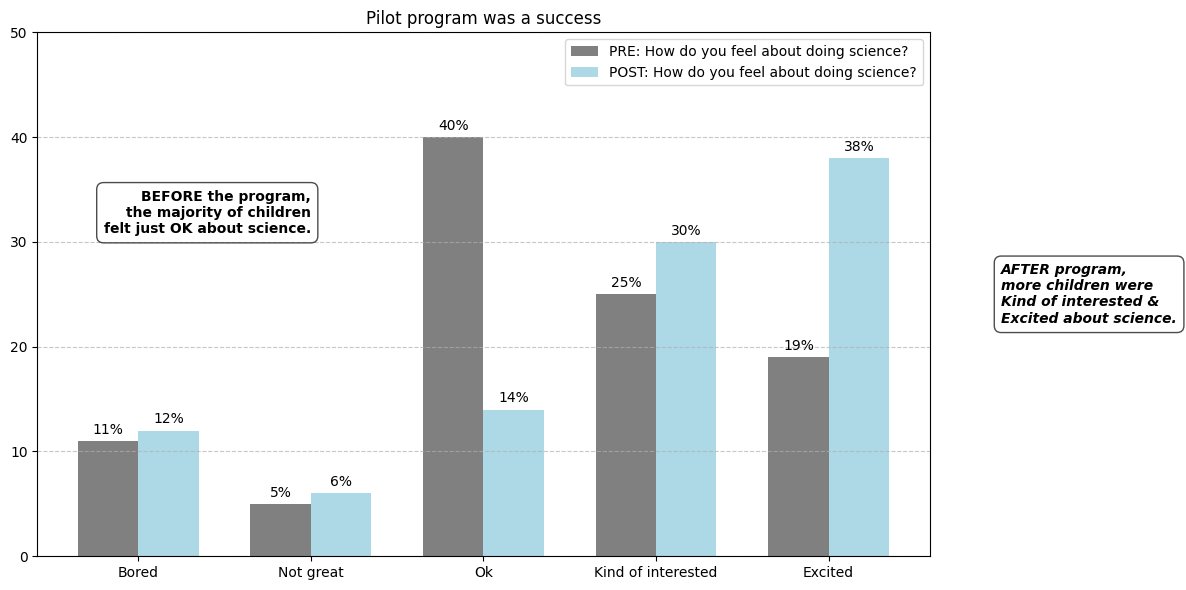

In [58]:
# FIGURE 0.5

import matplotlib.pyplot as plt

categories = ['Bored', 'Not great', 'Ok', 'Kind of interested', 'Excited']
pre_values = [11, 5, 40, 25, 19]
post_values = [12, 6, 14, 30, 38]

fig, ax = plt.subplots(figsize=(12, 6))
x = range(len(categories))
width = 0.35

rects1 = ax.bar([i - width/2 for i in x], pre_values, width, label='PRE: How do you feel about doing science?', color='grey')
rects2 = ax.bar([i + width/2 for i in x], post_values, width, label='POST: How do you feel about doing science?', color='lightblue')

for i, rect in enumerate(rects1):
    height = rect.get_height()
    ax.annotate(f'{pre_values[i]}%',
                xy=(rect.get_x() + rect.get_width()/2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

for i, rect in enumerate(rects2):
    height = rect.get_height()
    ax.annotate(f'{post_values[i]}%',
                xy=(rect.get_x() + rect.get_width()/2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_title('Pilot program was a success')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.set_ylim(0, 50)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

ax.text(1.0, 35, "BEFORE the program,\nthe majority of children\nfelt just OK about science.",
        fontsize=10, ha='right', va='top', weight='bold',
        bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.5'))

ax.text(5.0, 25, "AFTER program,\nmore children were\nKind of interested &\nExcited about science.",
        fontsize=10, ha='left', va='center', weight='bold', style='italic',
        bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.5'))

fig.tight_layout()
plt.show()